In [ ]:
# 使用resize处理出一批数据

In [1]:
from pathlib import Path
from hdf5storage import loadmat

def get_class_names(directory_path):
    # 转换为Path对象
    directory = Path(directory_path)
    # 确保路径存在且为目录
    if not directory.is_dir():
        raise ValueError(f"{directory_path} 不是一个有效的目录路径")
    
    # 创建一个集合来存储类别名，避免重复
    category_names = set()
    
    # 遍历主文件夹下的所有子文件夹
    for subfolder in directory.iterdir():
        if subfolder.is_dir():  # 检查是否为子文件夹
            # 遍历子文件夹中的文件
            category_names.add(subfolder.stem)
    
    # 返回类别名列表
    return list(category_names)

def get_iterfile_names(directory_path):
    # 转换为Path对象
    directory = Path(directory_path)
    # 确保路径存在且为目录
    if not directory.is_dir():
        raise ValueError(f"{directory_path} 不是一个有效的目录路径")
    
    # 创建一个集合来存储文件名，避免重复
    file_names = set()
    
    # 遍历主文件夹下的所有子文件夹
    for subfolder in directory.iterdir():
        if subfolder.is_file():  # 检查是否为子文件
            file_names.add(subfolder.stem)
    
    # 返回文件名列表
    return list(file_names)

def read_raw_signal_file(dataset_path, class_name, iterfile_name):
    iterfile_path = Path(dataset_path) / class_name / f"{iterfile_name}.mat"
    # mat = loadmat('/home/zhang/zxc/STFT_3DDL/DATASETS/raw_data/DAS1K/CARHORN/carhorn1.mat')
    mat = loadmat(str(iterfile_path))
    phase = mat[iterfile_name][0]
    intensity = mat[iterfile_name][1]
    # taxis = np.arange(len(phase))/10000
    # plt.figure(figsize=(15, 15))
    # plt.plot(taxis, phase)
    # plt.figure(figsize=(15, 15))
    # plt.plot(taxis, intensity)
    # print('test')
    return phase, intensity

dataset_path = Path('/home/zhang/zxc/STFT_3DDL/DATASETS/raw_data/DAS1K/')


In [2]:
import numpy as np
import matplotlib.pyplot as plt

原始长度:37459


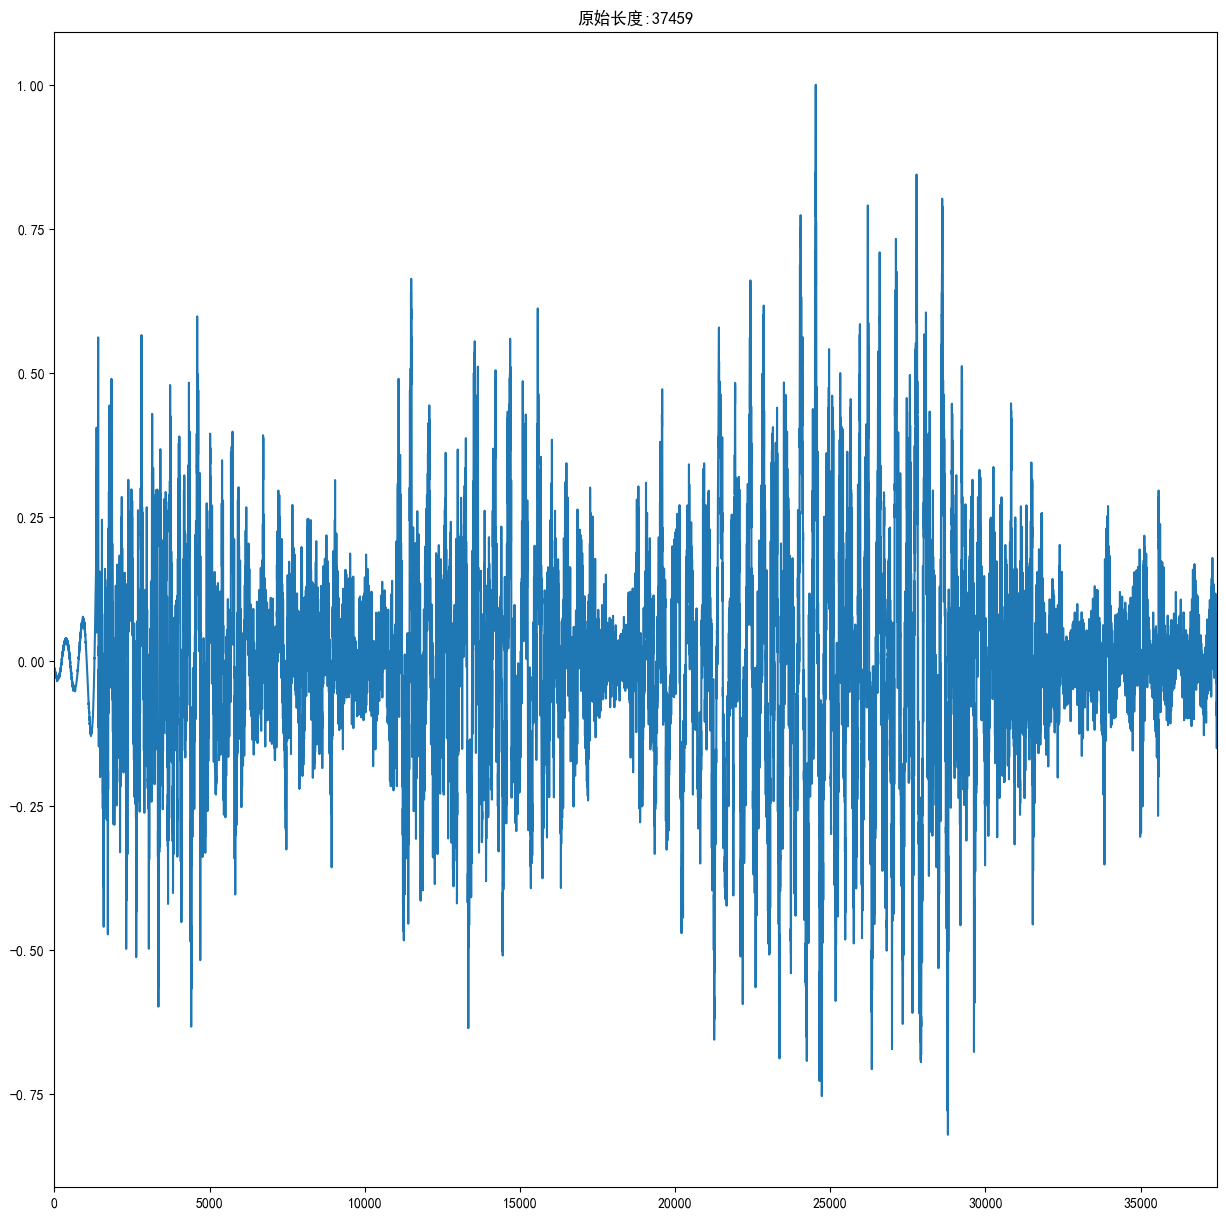

In [3]:
# 测试一个例子
class_name_0 = "CARHORN"
iterfile_name_0 = "carhorn29"

phase,_ = read_raw_signal_file(dataset_path, class_name_0, iterfile_name_0)
print(f"原始长度:{len(phase)}")

# 绘制原始图像
plt.figure(figsize=(15, 15))
plt.title(f"原始长度:{len(phase)}")
plt.plot(phase)
plt.xlim(0, len(phase))
plt.show()


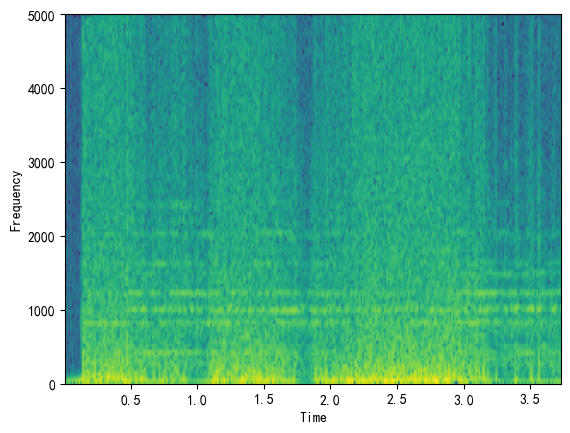

In [18]:
# 使用matplotlib默认参数处理图像
fig, ax = plt.subplots()
ax.specgram(phase, Fs=10000, cmap='viridis')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
plt.show()

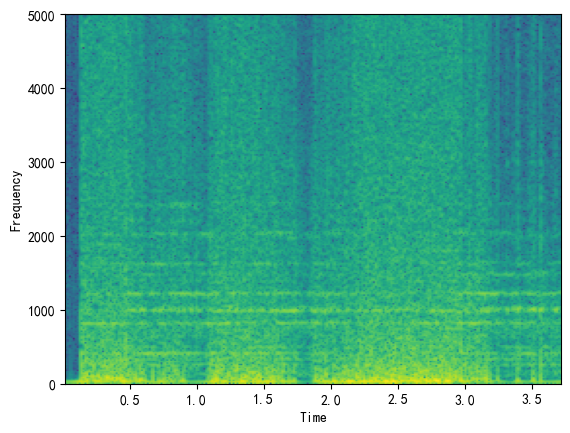

In [21]:
# 使用matplotlib默认参数处理图像
fig, ax = plt.subplots()
ax.specgram(phase, NFFT=510, Fs=10000, noverlap=365, cmap='viridis')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
plt.show()

In [42]:
from scipy import signal
from skimage.transform import resize
# 使用matplotlib中spectrum中nperseg、noverlap和window设置策略，用scipy.signal实现
# matplotlib中的参数设置如下
NFFT = 256
NOVERLAP = NFFT // 2
WINDOW = 'hann' # ”动态调节方法”使用的窗口是hamming窗口

def get_spectrum(signal_data, fs, window=WINDOW, nperseg=NFFT, noverlap=NOVERLAP):
    faxis, taxis, spectrum = signal.stft(signal_data, fs, window=window, nperseg=nperseg, noverlap=noverlap, boundary=None, padded=True)
    return faxis, taxis, spectrum

def resize_spectrum(spectrum, faxis, taxis, scale):
    # spectrum是已经np.abs过的
    spectrum_resized = resize(
        spectrum,
        (scale, scale),
        mode='reflect',
        anti_aliasing=True, # 平滑处理
        preserve_range=True, # 保留原始数值范围，避免自动归一化
    )
    
    # resize frequency和time axes
    new_freq_bins = scale
    new_time_bins = scale
    faxis_resized = np.linspace(faxis[0], faxis[-1], new_freq_bins)
    taxis_resized = np.linspace(taxis[0], taxis[-1], new_time_bins)
    return faxis_resized, taxis_resized, spectrum_resized

原始长度:37459


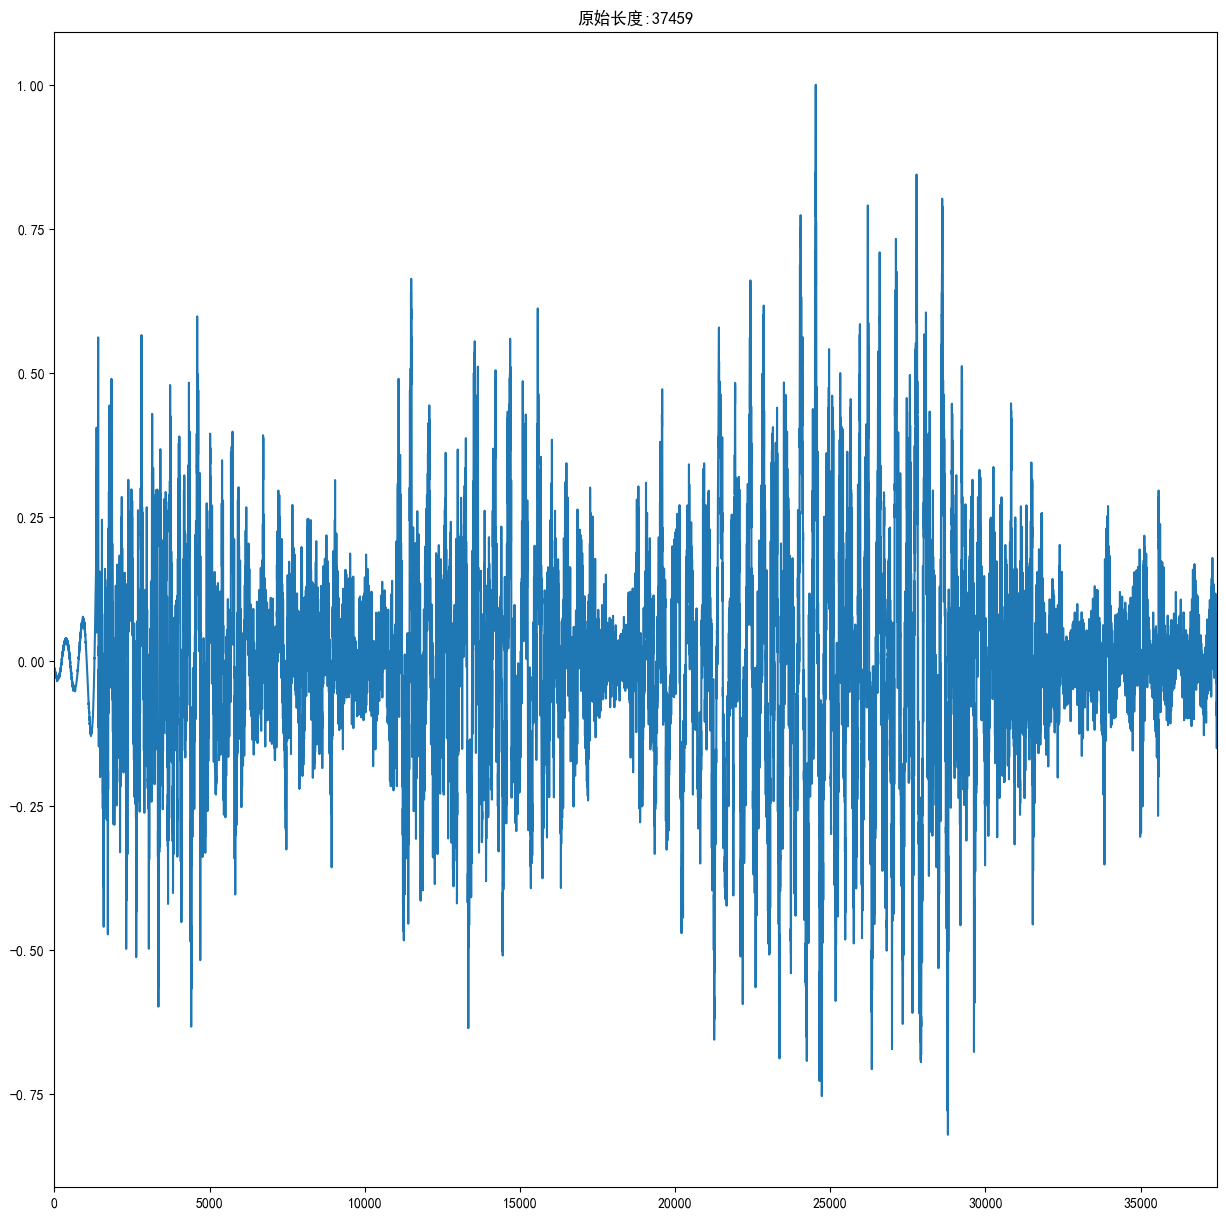

In [32]:
# 测试一个例子
class_name_0 = "CARHORN"
iterfile_name_0 = "carhorn29"

phase,_ = read_raw_signal_file(dataset_path, class_name_0, iterfile_name_0)
print(f"原始长度:{len(phase)}")

# 绘制原始图像
plt.figure(figsize=(15, 15))
plt.title(f"原始长度:{len(phase)}")
plt.plot(phase)
plt.xlim(0, len(phase))
plt.show()

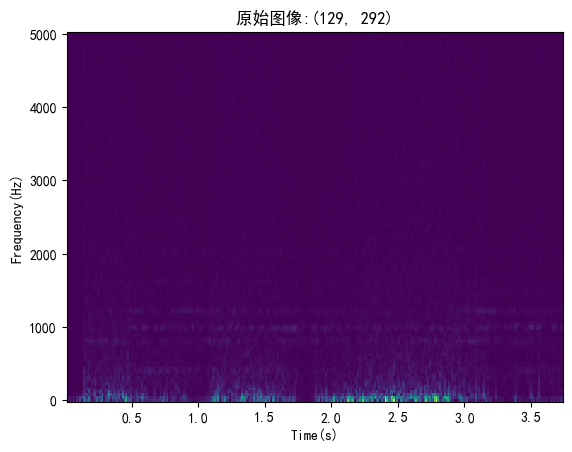

In [35]:
faxis, taxis, spectrum = get_spectrum(phase, fs=10000)
spectrum = np.abs(spectrum)
plt.figure()
plt.pcolormesh(taxis, faxis, spectrum)
plt.title(f"原始图像:{spectrum.shape}")
plt.xlabel('Time(s)')
plt.ylabel('Frequency(Hz)')
plt.xlim([taxis[0], taxis[-1]])
plt.show()


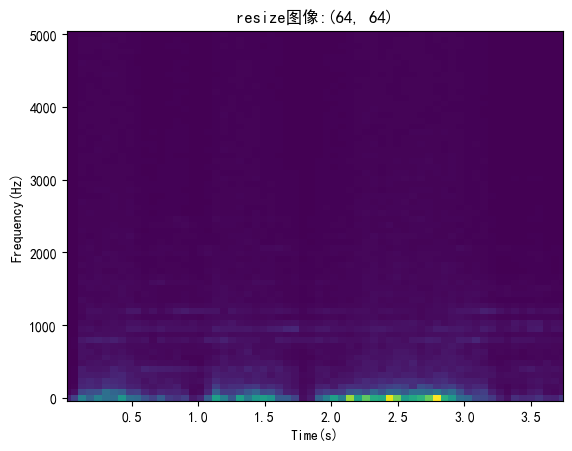

In [43]:
faxis, taxis, spectrum = get_spectrum(phase, fs=10000)
faxis, taxis, spectrum = resize_spectrum(np.abs(spectrum), faxis, taxis, 64)
plt.figure()
plt.pcolormesh(taxis, faxis, spectrum)
plt.title(f"resize图像:{spectrum.shape}")
plt.xlabel('Time(s)')
plt.ylabel('Frequency(Hz)')
plt.xlim([taxis[0], taxis[-1]])
plt.show()


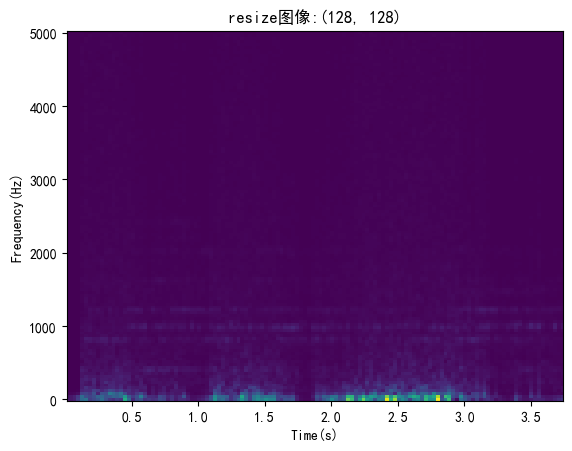

In [45]:
faxis, taxis, spectrum = get_spectrum(phase, fs=10000)
faxis, taxis, spectrum = resize_spectrum(np.abs(spectrum), faxis, taxis, 128)
plt.figure()
plt.pcolormesh(taxis, faxis, spectrum)
plt.title(f"resize图像:{spectrum.shape}")
plt.xlabel('Time(s)')
plt.ylabel('Frequency(Hz)')
plt.xlim([taxis[0], taxis[-1]])
plt.show()

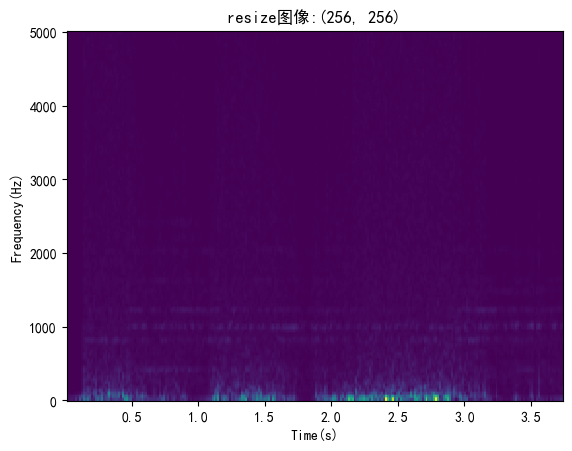

In [46]:
faxis, taxis, spectrum = get_spectrum(phase, fs=10000)
faxis, taxis, spectrum = resize_spectrum(np.abs(spectrum), faxis, taxis, 256)
plt.figure()
plt.pcolormesh(taxis, faxis, spectrum)
plt.title(f"resize图像:{spectrum.shape}")
plt.xlabel('Time(s)')
plt.ylabel('Frequency(Hz)')
plt.xlim([taxis[0], taxis[-1]])
plt.show()
